In [2]:
import pandas as pd
import numpy as np

In [3]:
# Create a sample time series dataframe
data = {
    'timestamp': pd.date_range(start='2024-01-01', periods=100, freq='h'),
    'value': np.random.randint(1, 10, 100)
}
df = pd.DataFrame(data)

In [4]:
# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

In [5]:
# Define hopping window parameters
window_size = '3h'  # Window duration
hop_size = '1h'     # Hop interval

In [6]:
# Create hopping windows
df['hopping_mean'] = df['value'].rolling(window=window_size, min_periods=1).mean().shift(-1)

print(df)

df = df.reset_index()

                     value  hopping_mean
timestamp                               
2024-01-01 00:00:00      4      2.500000
2024-01-01 01:00:00      1      2.333333
2024-01-01 02:00:00      2      3.000000
2024-01-01 03:00:00      6      5.333333
2024-01-01 04:00:00      8      7.333333
...                    ...           ...
2024-01-04 23:00:00      4      5.333333
2024-01-05 00:00:00      3      3.333333
2024-01-05 01:00:00      3      5.000000
2024-01-05 02:00:00      9      4.333333
2024-01-05 03:00:00      1           NaN

[100 rows x 2 columns]


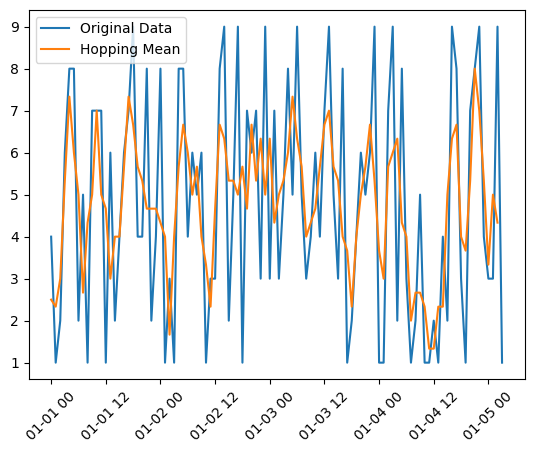

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['timestamp'], df['value'], label='Original Data')
plt.plot(df['timestamp'], df['hopping_mean'], label='Hopping Mean')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.title('Sensor Readings with Hopping Window Mean')
plt.legend()

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()